In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [28]:
df = pd.read_csv(r'C:\Users\kaush\Desktop\__ML__PR\ML Dataset\Decision Tree & Naive Bayes Classification\madfhantr.csv')

In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
df.dropna(inplace=True)

In [31]:
df['Loan_ID'] = df['Loan_ID'].apply(lambda x : x[2:])

In [32]:
df['Gender'] = df['Gender'].apply(lambda x : 1 if(x=='Male') else 0)

In [35]:
df['Education'] = df['Education'].apply(lambda x : 1 if(x=='Graduate') else 0)

In [38]:
df['Married'] = df['Married'].apply(lambda x : 1 if(x=='Yes') else 0)

In [40]:
df['Rural'] = df['Property_Area'].apply(lambda x : 1 if(x=='Rural') else 0)

In [42]:
df['Semiurban'] = df['Property_Area'].apply(lambda x : 1 if(x=='Semiurban') else 0)

In [43]:
df['Urban'] = df['Property_Area'].apply(lambda x : 1 if(x=='Urban') else 0)

In [48]:
df['Self_Employed'] = df['Self_Employed'].apply(lambda x : 1 if(x=='Yes') else 0)

In [62]:
df['Dependents'] = df['Dependents'].apply(lambda x : int(x[:-1]) if(x[-1]=='+') else int(x)) 

In [44]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda x : 1 if(x=='Y') else 0)

In [46]:
df.drop(['Property_Area'],axis = 1,inplace=True)

In [63]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
1,001003,1,0,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,001005,1,0,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,001006,1,0,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1
5,001011,1,0,2,0,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1


In [64]:
dt = DecisionTreeClassifier()

In [65]:
target = df['Loan_Status']

In [66]:
inp = df.drop(['Loan_Status'],axis=1)

In [67]:
x_train,x_test,y_train,y_test = train_test_split(inp,target)

In [69]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
yhat = dt.predict(x_test)

In [73]:
dt.score(x_test,y_test)

0.7

In [75]:
import matplotlib.pyplot as plt

In [79]:
plt.figure(figsize=(50,50),dpi=50)

<Figure size 2500x2500 with 0 Axes>

<Figure size 2500x2500 with 0 Axes>

[Text(109.7546723300971, 211.04470588235293, 'X[10] <= 0.5\ngini = 0.411\nsamples = 360\nvalue = [104, 256]'),
 Text(22.75339805825243, 198.25411764705882, 'X[8] <= 129.0\ngini = 0.208\nsamples = 51\nvalue = [45, 6]'),
 Text(16.252427184466022, 185.4635294117647, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(29.254368932038837, 185.4635294117647, 'X[0] <= 2191.5\ngini = 0.386\nsamples = 23\nvalue = [17, 6]'),
 Text(16.252427184466022, 172.6729411764706, 'X[7] <= 2157.5\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(9.751456310679613, 159.88235294117646, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(22.75339805825243, 159.88235294117646, 'X[8] <= 147.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(16.252427184466022, 147.09176470588235, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(29.254368932038837, 147.09176470588235, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(42.25631067961165, 172.6729411764706, 'X[12] <= 0.5\ngini = 0.153\nsamples = 12\nvalue = [11

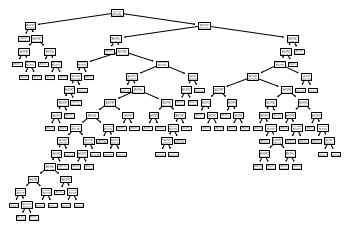

In [77]:
tree.plot_tree(dt)